Assumptions in Multilinear Regression

1. Linearity : The relationship between the predictors and the response is linear.
 
2. Independence : Observations are independent of each other.
 
3. Homoscedasticity : The residuals (Y - Y_hat)) exhibit constant variance at all levels of the predictor.
 
4. Normal Distribution of Errors : The residuals of the model are normally distributed.
 
5. No multicollinearity : The independent variables should not to be too highly corelated with each other.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [3]:
# Read the data from csv file
cars = pd.read_csv("Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [4]:
# Rearrange the columns
cars = pd.DataFrame(cars, columns=["HP","VOL"<"SP", "WT","MPG"])
cars.head()

,HP,False,WT,MPG
0,49,NaN,28.762059,53.700681
1,55,NaN,30.466833,50.013401
2,55,NaN,30.193597,50.013401
3,70,NaN,30.632114,45.696322
4,53,NaN,29.889149,50.504232


#### Description of columns
- MPG : Milege of the car(Mile per Gallon) (This is Y-column to be predicted)
- HP : Horse Power of the car(X1 column)
- VOl : Volume of the car (size) (X2 column)
- SP : Top speed of the car (Miles per Hour) (X3 column)
- WT : Weight of the car (Pounds) (X4 Column)

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   False   0 non-null      float64
 2   WT      81 non-null     float64
 3   MPG     81 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 2.7 KB


In [7]:
cars.isnull().sum()

HP        0
False    81
WT        0
MPG       0
dtype: int64

#### Observations
- There are no missing values
- There are 81 observations (81 different cars data)
- The data types of the columns are also relevant and valid

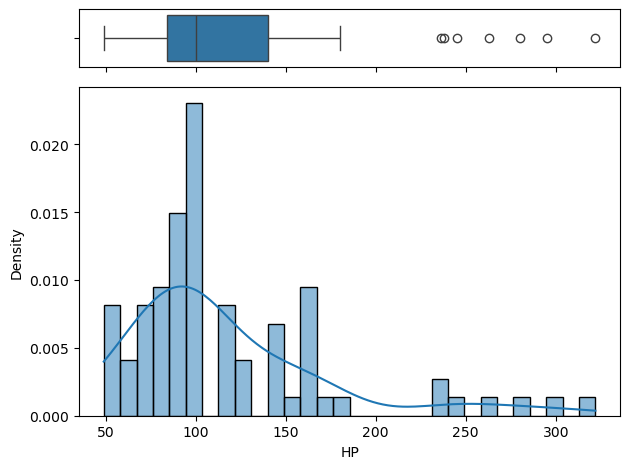

In [9]:
# Create a figure with two subplots (one above the other)
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
#Creating a boxplot
sns.boxplot(data=cars, x='HP', ax=ax_box, orient='h')
ax_box.set(xlabel='') #Remove x label for thge boxplot
#Creating a histogram in the same x-axis
sns.histplot(data=cars, x='HP', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')
#Adjust layout
plt.tight_layout()
plt.show()

#### Observations from boxplot and histograms
- There are some extreme values (outliers) observed in towards the right tail of SP and HP distributions.
- In VOL and WT columns, afew outliers are observed in both tails of their distributions.
- The extreme values of cars data may have come from the specially designed nature of cars.
- As this is multi-dimensional data, the outliers with respect to spatial dimensions may have to be considered while building the regression model

#### Checking for duplicated rows

In [12]:
cars[cars.duplicated()]

,HP,False,WT,MPG


#### Pair plots and Correlation Coefficients

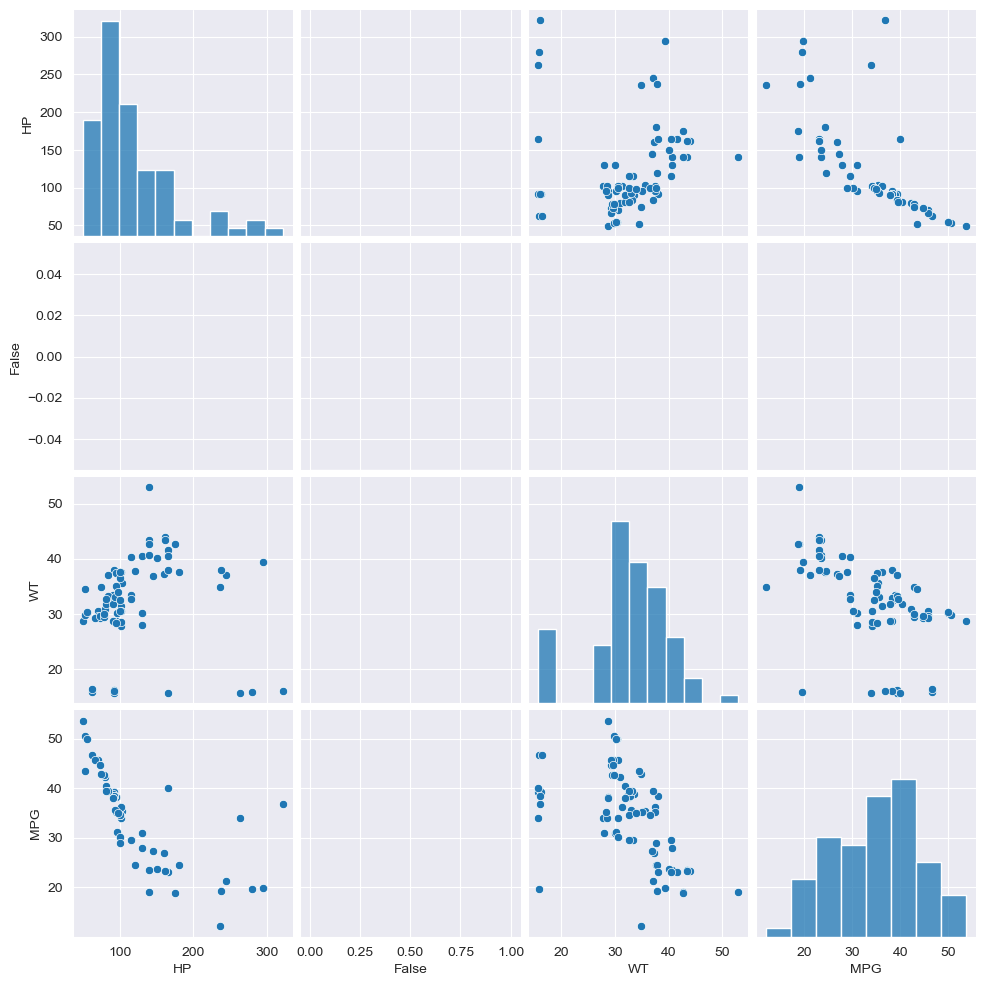

In [14]:
#Pair plot
sns.set_style(style='darkgrid')
sns.pairplot(cars)

#### Observations
 - Extreme values observed towards the right tail.
 - A few outliers present in both tails.
 - Outliers may be due to unique high-performance car models.

In [16]:
cars.corr()

,HP,False,WT,MPG
HP,1.000000,NaN,0.076513,-0.725038
False,NaN,NaN,NaN,NaN
WT,0.076513,NaN,1.000000,-0.526759
MPG,-0.725038,NaN,-0.526759,1.000000


#### Observations from correlation plots and Coefficients
- Between x and y, all the variables are showing moderate to high correlation strengths,highest being between HP and MPG.
- Therefore this dataset qualifies for building a multiple linear regression model to predict MPG.
- Among x columns (x1,x2,x3 and x4),some very high correlation strengths are observed between SP vs HP,VOL vs WT.
- The high correlation among x columns is not desirable as it might lead to multicollinearity problem

#### Preparing a preliminary model considering all X columns

In [22]:
#Build model
#import statsmodels.formula.api as smf
model = smf.ols('MPG~WT+SP+HP',data=cars).fit()

PatsyError: Error evaluating factor: NameError: name 'SP' is not defined
    MPG~WT+SP+HP
           ^^

In [ ]:
model.summary()